In [117]:
%matplotlib inline
from IPython import display
from mxnet import nd
from time import time
import random
from matplotlib import pyplot as plt

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)
c = nd.zeros(shape=1000)

In [118]:
start = time()
for i in range(a.shape[0]):
        c[i] = a[i] + b[i]
print(time() - start)

start = time()
c = a + b
print(time() - start)


0.18999791145324707
0.0004391670227050781


In [119]:
a = nd.ones(shape=(3,1))
b = 10
print(a + b)



[[11.]
 [11.]
 [11.]]
<NDArray 3x1 @cpu(0)>


In [120]:
num_inputs = 3
num_examples = 1000
# test 
# print(nd.dot(labels.reshape(-1,1), params.reshape(1, -1))) #use reshape to convert ndarray into matrix (vector)

In [121]:
# generate the synthetic dataset
params= nd.array([2.3, -12]).reshape(1, -1)
Xmat = nd.concat(nd.random.normal(loc=0, scale=5, shape=(1, 1000)),(nd.random.uniform(1, 1, shape=(1, 1000))), dim=0)
Xmat = Xmat.T

In [122]:
# generate the synthetic responses based on the params, and a noise vector
responses = nd.dot(Xmat, params.T) 
noise = nd.random.normal(loc=0, scale=5, shape=(1000, 1))
responses = responses + noise

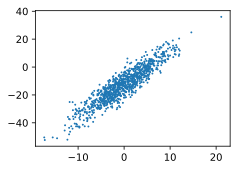

In [123]:
# visualize the dataset
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(Xmat[:, 0].asnumpy(), responses.asnumpy(), 1)

In [127]:
# read from dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(num_examples, i + batch_size)])
        yield features.take(j), labels.take(j)
        
batch_size = 10
for X,y in data_iter(batch_size, Xmat, responses):
    print(X, y)
    break


[[  8.678334    1.       ]
 [  5.4886036   1.       ]
 [ -3.4762487   1.       ]
 [ -4.730808    1.       ]
 [-11.839481    1.       ]
 [  3.70711     1.       ]
 [ -3.287258    1.       ]
 [ -2.8983      1.       ]
 [ -0.5698143   1.       ]
 [ -4.550061    1.       ]]
<NDArray 10x2 @cpu(0)> 
[[  9.9045725]
 [ -4.9997077]
 [-19.990372 ]
 [-34.32185  ]
 [-25.088688 ]
 [ -7.5044794]
 [-10.8870125]
 [-24.341827 ]
 [-15.040075 ]
 [-22.524328 ]]
<NDArray 10x1 @cpu(0)>


In [128]:
# regression funcitons
betas = nd.array([1, 2]).reshape(1, -1)
betas.attach_grad()

def predictor(Xmat, cof):
    return nd.dot(Xmat, cof)

def squared_loss(yhat, y):
    return (yhat - y) ** 2 / 2

# optimizer
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size


In [ ]:
# regression model
lr = 0.03
num_epochs = 3
net = predictor
loss = sqaured_loss

for epoch in range(num_epochs):
    for X, y in data_iter(10, X, responses):
        with autograd.record():
            